In [1]:
import time
import datetime as dt
import newspaper
from newspaper import *
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import imageio
from nltk.corpus import stopwords
from transformers import pipeline
available_websites = ['time']
plt.rcParams['figure.dpi'] = 500
plt.rcParams['figure.figsize'] = [6, 6]

In [2]:
class News(Article):
    def __init__(self, url):
        super().__init__(url)
        self.download()
        self.parse()
        self.publish_date = self.publish_date.strftime('%Y-%m-%d')
        self.generator = pipeline(model="distilbert-base-uncased-finetuned-sst-2-english")
        self.sentiment = None

    def get_sentiment(self):
        self.sentiment = self.generator(self.text)['positive']
        return self.sentiment

In [3]:
class SearchEngine(object):
    def __init__(self, name, keyword, pages=1, sleep=0.5, filter_={}):
        self.name = name
        self.keyword = keyword
        self.filter_ = filter_
        self.page = 1
        self.sleep = sleep
        self.pages = pages
        self.info = {'time':f'https://time.com/search/?q={self.keyword}&page={self.page}'}
        self.loc = {'time':'media-img margin-8-bottom'}
        self.available_websites = list(self.info.keys())
        self.urls = None
        self.get_all_urls()

    def get_urls(self, page):
        self.page = page
        time.sleep(self.sleep)
        return list(map(lambda x: x['href'], BeautifulSoup(requests.get(self.info[self.name]).text, 'html.parser').find_all('a', class_=self.loc[self.name])))

    def get_all_urls(self):
        self.urls = list(set(sum(list(map(lambda x: self.get_urls(x), range(1, self.pages+1))), [])))
        return None

    def parse(self):
        self.news = list(map(lambda x: News(x), self.urls))
        return self.news

    def save(self, path):
        return None

In [5]:
class Word_Cloud_Generator(object):
    def __init__(self, country=None, words=None, language='english'):
        self.words = ''
        self.language = language
        self.stopwords = stopwords.words(self.language)
        if country:
            self.country = country
            self.mask = imageio.v2.imread(f"Flag_images/{self.country}.png")[:, :, :3]
            self.colors = ImageColorGenerator(self.mask)
            self.WC = WordCloud(stopwords=self.stopwords, background_color="white", mode="RGBA", max_words=500, mask=self.mask)
        else:
            self.WC = WordCloud(stopwords=self.stopwords, background_color="white", mode="RGBA", max_words=500)

    def add_word(self, text):
        self.word += text
        return None

    def add_texts(self, texts):
        self.word += ' '.join(texts)
        return None

    def generate(self):
        self.WC.generate(self.word)
        plt.imshow(sample2.recolor(color_func=US_colors), interpolation="bilinear")
        plt.axis("off")
        plt.show()
        return None

In [2]:
from utils import *

In [108]:
CN_mask = imageio.v2.imread("China_flag.png")[:, :, :3]
CNWC = WordCloud(stopwords=stopwords.words('chinese'), background_color="white", mode="RGBA", max_words=100, mask=CN_mask)
CN_colors = ImageColorGenerator(CN_mask)

In [109]:
US_mask = imageio.v2.imread("US_flag.png")[:, :, :3]
USWC = WordCloud(stopwords=stopwords.words('english'), background_color="white", mode="RGBA", max_words=500, mask=US_mask)
US_colors = ImageColorGenerator(US_mask)

In [110]:
sample1 = CNWC.generate(sample.text)
sample2 = USWC.generate(sample.text)

(-0.5, 2879.5, 1515.5, -0.5)

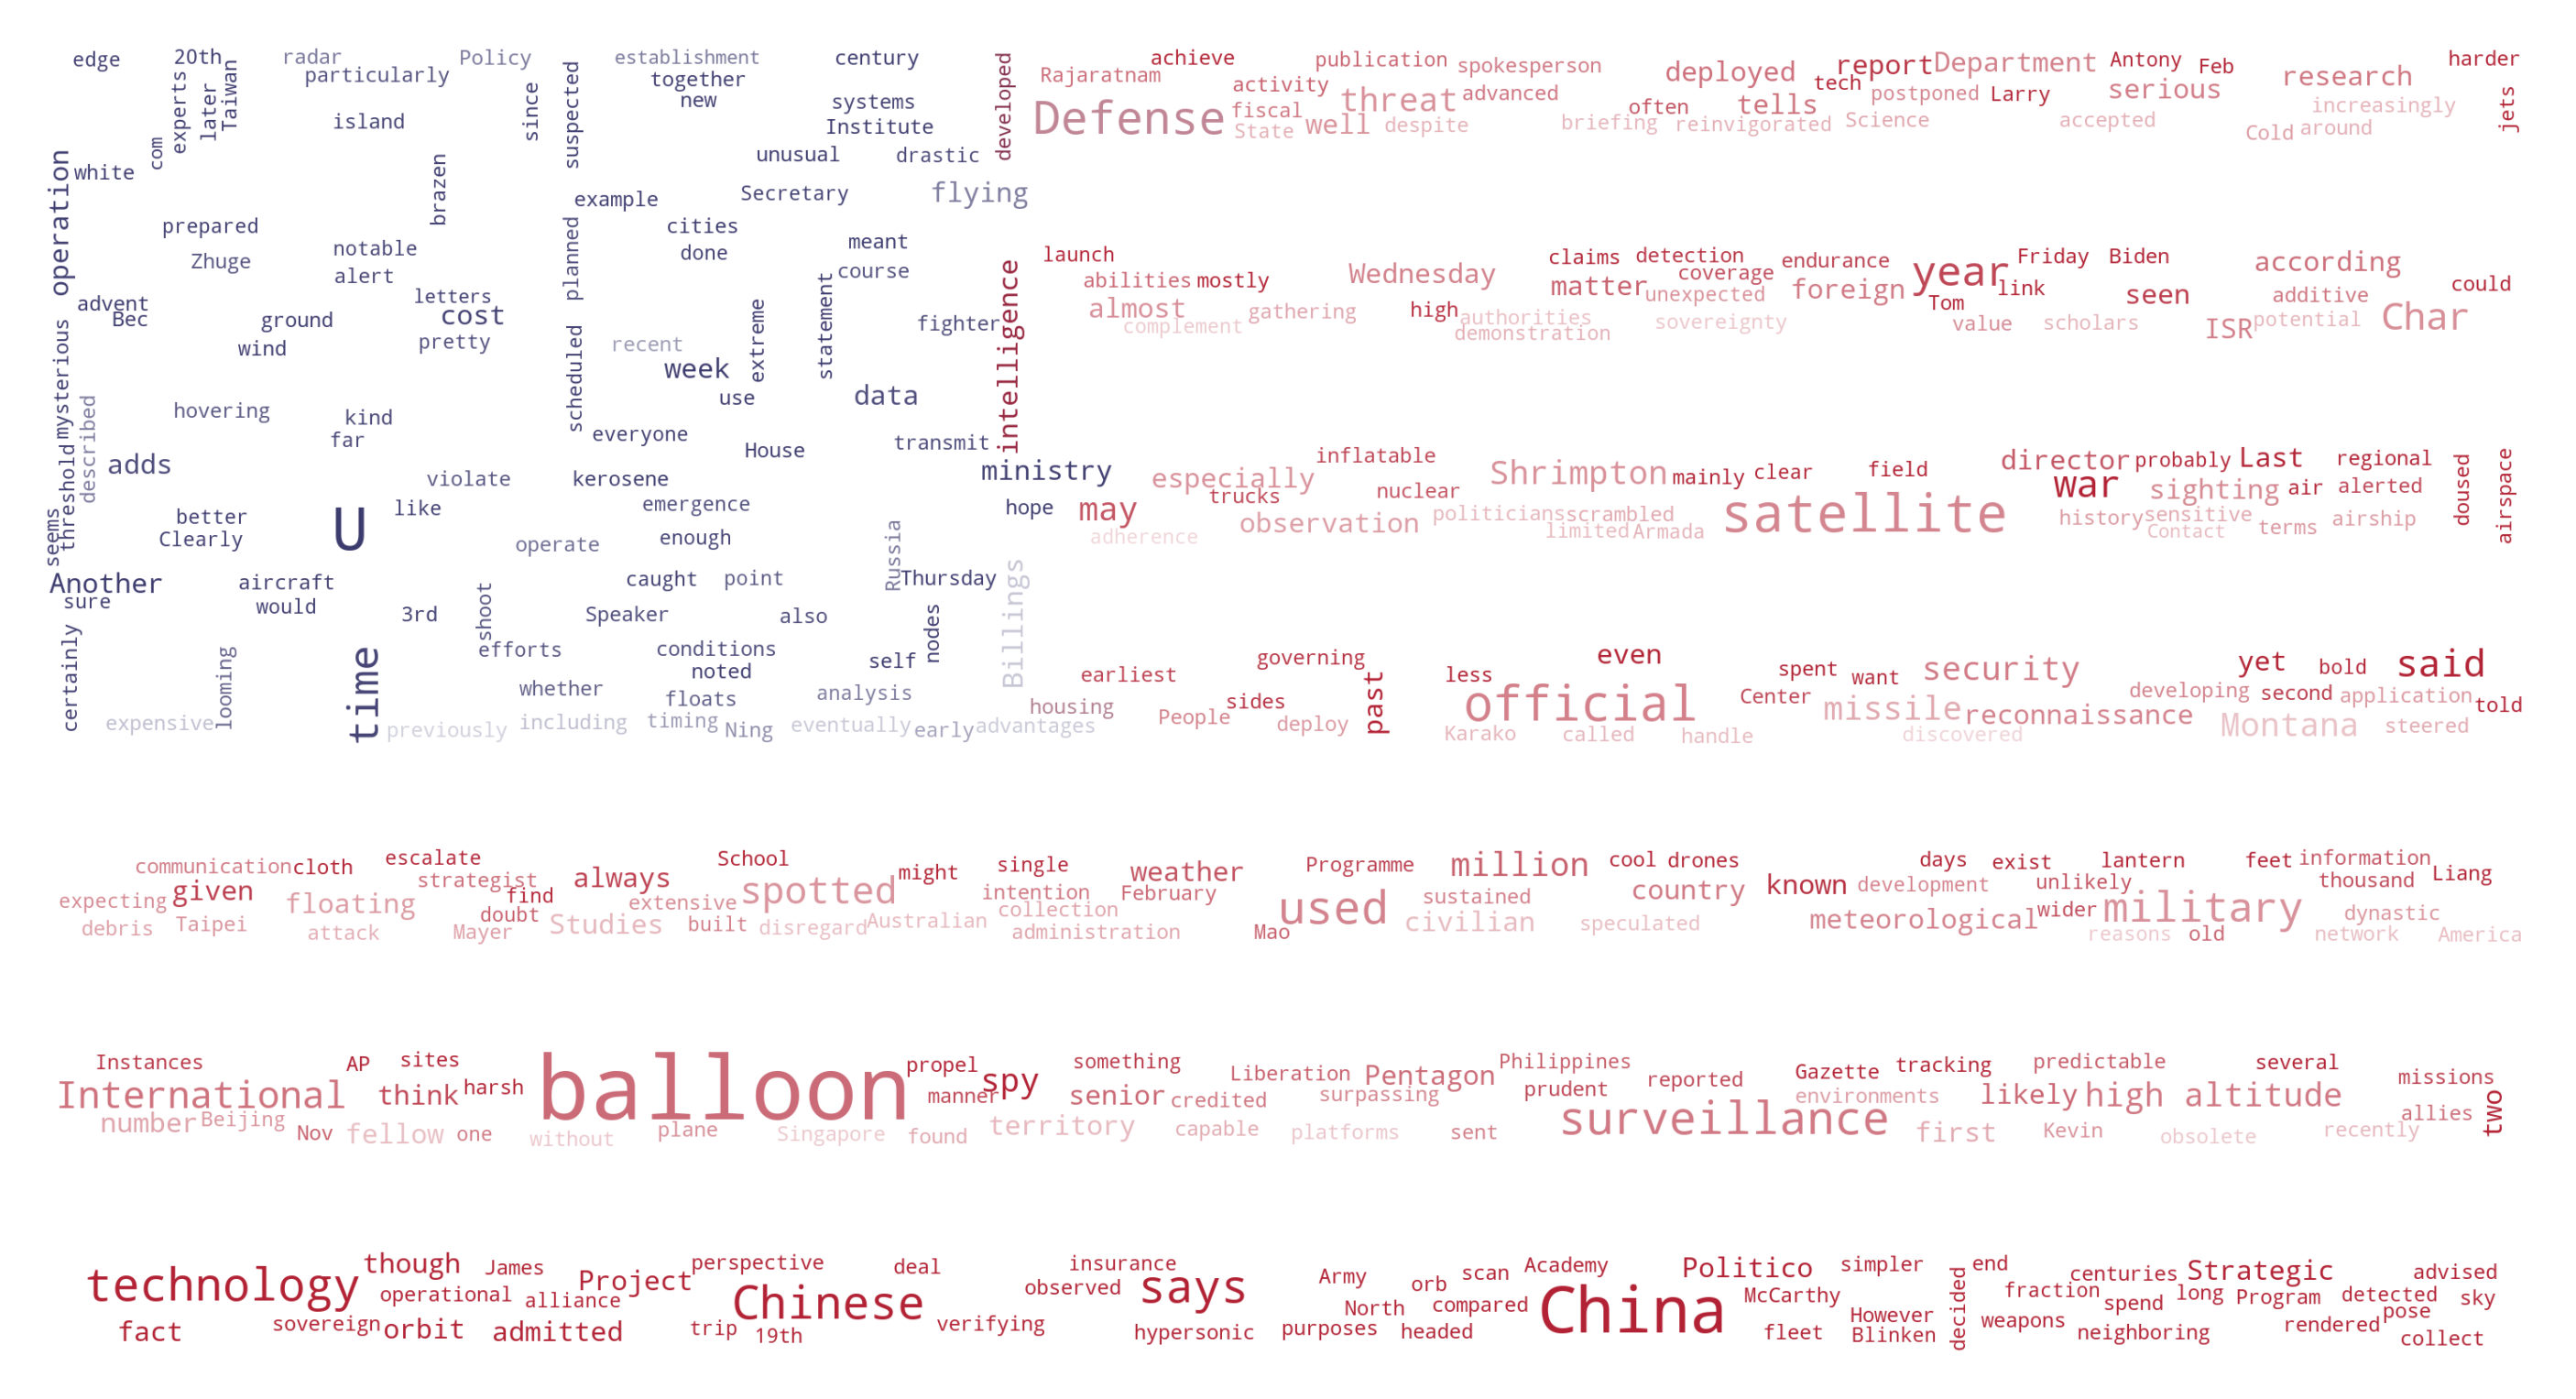

In [111]:

plt.imshow(sample2.recolor(color_func=US_colors), interpolation="bilinear")
plt.axis("off")

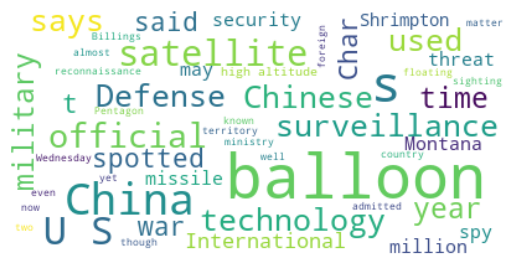

In [41]:
plt.imshow(sample_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
domain = urlparse('https://time.com/search/?q=China').netloc
print(domain)

time.com


In [112]:
newspaper.popular_urls()

['http://www.huffingtonpost.com',
 'http://cnn.com',
 'http://www.time.com',
 'http://www.ted.com',
 'http://pandodaily.com',
 'http://www.cnbc.com',
 'http://www.mlb.com',
 'http://www.pcmag.com',
 'http://www.foxnews.com',
 'http://theatlantic.com',
 'http://www.bbc.co.uk',
 'http://www.vice.com',
 'http://www.elle.com',
 'http://www.vh1.com',
 'http://espnf1.com',
 'http://espn.com',
 'http://www.npr.org',
 'http://www.sfgate.com',
 'http://www.glamour.com',
 'http://www.whosdatedwho.com',
 'http://kotaku.com',
 'http://thebostonchannel.com',
 'http://www.suntimes.com',
 'http://www.businessinsider.com',
 'http://www.rivals.com',
 'http://thebusinessjournal.com',
 'http://www.newrepublic.com',
 'http://allthingsd.com',
 'http://www.topgear.com',
 'http://thecitizen.com',
 'http://www.ign.com',
 'http://www.sci-news.com',
 'http://www.morningstar.com',
 'http://www.variety.com',
 'http://thebottomline.as.ucsb.edu',
 'http://www.gamefaqs.com',
 'http://blog.searchenginewatch.com',
 'h

In [119]:
test = requests.get('https://www.cnn.com/search?q=china&from=0&size=10&page=1&sort=newest&types=all&section=')

In [122]:
soup = BeautifulSoup(test.text, 'html.parser')

In [ ]:
import transformers

In [3]:
generator("Hello, I'm a single sentence!")

[{'label': 'POSITIVE', 'score': 0.9830462336540222}]

In [14]:
a =